In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
x_mean = df['TV'].mean()
y_mean = df['Sales'].mean()

print("Mean of TV:", x_mean)
print("Mean of Sales:", y_mean)


Mean of TV: 147.0425
Mean of Sales: 15.130500000000001


In [ ]:
df['(x - x_mean)'] = df['TV'] - x_mean
df['(y - y_mean)'] = df['Sales'] - y_mean
df['(x - x_mean)*(y - y_mean)'] = df['(x - x_mean)'] * df['(y - y_mean)']
df['(x - x_mean)^2'] = df['(x - x_mean)']**2

b1 = df['(x - x_mean)*(y - y_mean)'].sum() / df['(x - x_mean)^2'].sum()
b0 = y_mean - b1*x_mean

print(f"Slope (b1): {b1:.2f}")
print(f"Intercept (b0): {b0:.2f}")
print(f"Regression Equation: y = {b0:.2f} + {b1:.2f}x")


Slope (b1): 0.06
Intercept (b0): 6.97
Regression Equation: y = 6.97 + 0.06x


In [ ]:
df['y_pred'] = b0 + b1 * df['TV']
df['Residual'] = df['Sales'] - df['y_pred']
df[['Sales','y_pred','Residual']]


,Sales,y_pred,Residual
0,22.1,19.737265,2.362735
1,10.4,9.443004,0.956996
2,12.0,7.928816,4.071184
3,16.5,15.377734,1.122266
4,17.9,17.002852,0.897148
...,...,...,...
195,7.6,9.093576,-1.493576
196,14.0,12.199603,1.800397
197,14.8,16.792086,-1.992086
198,25.5,22.704630,2.795370


In [ ]:
SSE = (df['Residual']**2).sum()
SST = ((df['Sales'] - y_mean)**2).sum()
R2 = 1 - (SSE / SST)

print(f"R2 Score: {R2:.3f}")


R2 Score: 0.812


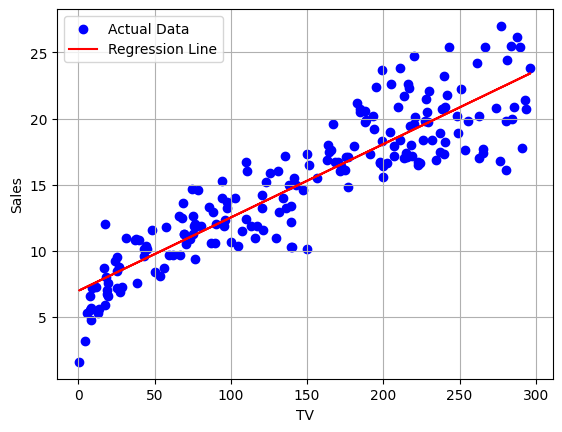

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'], color='blue', label='Actual Data')
plt.plot(df['TV'], df['y_pred'], color='red', label='Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y=pd.Series(df['Sales'])
x=pd.DataFrame(df['TV'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
pred_sk = model.predict(df[['TV']])
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R^2 Score:", model.score(x, y))
print("Regression equation: y = ", model.intercept_, " + ", model.coef_[0], "x")

Intercept: 7.007108428241848
Slope: 0.0554829439314632
R^2 Score: 0.8121316219239643
Regression equation: y =  7.007108428241848  +  0.0554829439314632 x


In [ ]:
df

,TV,Radio,Newspaper,Sales,(x - x_mean),(y - y_mean),(x - x_mean)*(y - y_mean),(x - x_mean)^2,y_pred,Residual
0,230.1,37.8,69.2,22.1,83.0575,6.9695,578.869246,6898.548306,19.737265,2.362735
1,44.5,39.3,45.1,10.4,-102.5425,-4.7305,485.077296,10514.964306,9.443004,0.956996
2,17.2,45.9,69.3,12.0,-129.8425,-3.1305,406.471946,16859.074806,7.928816,4.071184
3,151.5,41.3,58.5,16.5,4.4575,1.3695,6.104546,19.869306,15.377734,1.122266
4,180.8,10.8,58.4,17.9,33.7575,2.7695,93.491396,1139.568806,17.002852,0.897148
...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-108.8425,-7.5305,819.638446,11846.689806,9.093576,-1.493576
196,94.2,4.9,8.1,14.0,-52.8425,-1.1305,59.738446,2792.329806,12.199603,1.800397
197,177.0,9.3,6.4,14.8,29.9575,-0.3305,-9.900954,897.451806,16.792086,-1.992086
198,283.6,42.0,66.2,25.5,136.5575,10.3695,1416.032996,18647.950806,22.704630,2.795370


In [ ]:
pred_sk=pd.DataFrame(pred_sk,columns=['Pred_sk'])
pred_sk

,Pred_sk
0,19.773734
1,9.476099
2,7.961415
3,15.412774
4,17.038425
...,...
195,9.126557
196,12.233602
197,16.827590
198,22.742071


In [ ]:
Compare=pd.concat([df,pred_sk],axis=1)

In [ ]:
Compare

,TV,Radio,Newspaper,Sales,(x - x_mean),(y - y_mean),(x - x_mean)*(y - y_mean),(x - x_mean)^2,y_pred,Residual,Pred_sk
0,230.1,37.8,69.2,22.1,83.0575,6.9695,578.869246,6898.548306,19.737265,2.362735,19.773734
1,44.5,39.3,45.1,10.4,-102.5425,-4.7305,485.077296,10514.964306,9.443004,0.956996,9.476099
2,17.2,45.9,69.3,12.0,-129.8425,-3.1305,406.471946,16859.074806,7.928816,4.071184,7.961415
3,151.5,41.3,58.5,16.5,4.4575,1.3695,6.104546,19.869306,15.377734,1.122266,15.412774
4,180.8,10.8,58.4,17.9,33.7575,2.7695,93.491396,1139.568806,17.002852,0.897148,17.038425
...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-108.8425,-7.5305,819.638446,11846.689806,9.093576,-1.493576,9.126557
196,94.2,4.9,8.1,14.0,-52.8425,-1.1305,59.738446,2792.329806,12.199603,1.800397,12.233602
197,177.0,9.3,6.4,14.8,29.9575,-0.3305,-9.900954,897.451806,16.792086,-1.992086,16.827590
198,283.6,42.0,66.2,25.5,136.5575,10.3695,1416.032996,18647.950806,22.704630,2.795370,22.742071


In [ ]:
Compare[['Sales','y_pred','Pred_sk']]

,Sales,y_pred,Pred_sk
0,22.1,19.737265,19.773734
1,10.4,9.443004,9.476099
2,12.0,7.928816,7.961415
3,16.5,15.377734,15.412774
4,17.9,17.002852,17.038425
...,...,...,...
195,7.6,9.093576,9.126557
196,14.0,12.199603,12.233602
197,14.8,16.792086,16.827590
198,25.5,22.704630,22.742071
